# Homework 1: Dependence and Regression (50 points)

**Reading**: Data8 textbook chapter [15](https://www.inferentialthinking.com/chapters/15/Prediction).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.
 
Homework 1 is due **Thursday, 1/12 at 9:00am**. Late work will not be accepted.  You should start early so that you have time to get help if you're stuck. 

In [3]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Restaurant Data (9 points) 

The data below represent average ratings for 15 restaurants different aspects (ambience, food, service, and overall rating) as provided by previous customers. We want to investigate the importance of ambience, food, and service to the overall rating.


In [4]:
ratings_df=pd.read_csv("ratings.csv")
ratings_df

,restaurant,food,ambience,service,rating
0,1,85,82,89,78
1,2,80,90,80,85
2,3,83,86,83,85
3,4,70,96,75,72
4,5,68,80,78,75
5,6,65,70,56,54
6,7,64,68,61,62
7,8,72,95,72,73
8,9,69,70,78,70
9,10,75,80,75,77


#### Question 1

Draw three scatter plots of: rating versus ambience (rating is on the y axis), rating versus food and rating versus service. Use more than one cell if needed.

Text(0.5, 1.0, 'Restaurant Service VS Rating')

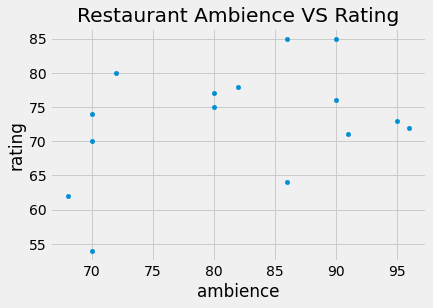

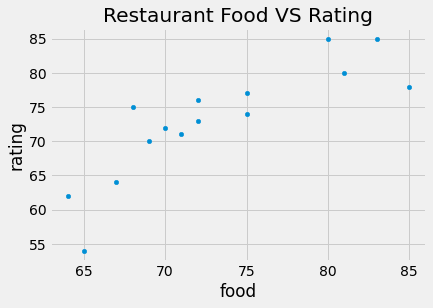

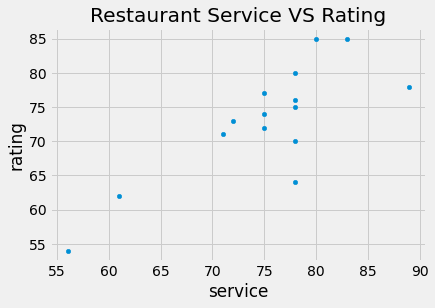

In [5]:
# code here and in additional cells if needed
ratings_df.plot.scatter('ambience','rating')
plt.title('Restaurant Ambience VS Rating')
ratings_df.plot.scatter('food','rating')
plt.title('Restaurant Food VS Rating')
ratings_df.plot.scatter('service','rating')
plt.title('Restaurant Service VS Rating')

#### Question 2

Calculate the regression (least squares) lines for: (i) rating versus ambience (rating  is the response variable, denoted by Y in class notes); (ii) rating versus food; and (iii) rating versus service.  Interpret the slopes in terms of the problem.

In [149]:
# code here and in additional cells if needed
def line_mse(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mse(a):
        estimate = a[0]*x + a[1]
        return (np.mean((y - estimate) ** 2)) 
    return minimize(mse,x0=[0,0],method="Powell") 

from scipy.optimize import minimize

In [41]:
#ratings vs ambience
line_mse(ratings_df['rating'],ratings_df['ambience']).x

array([ 0.43786981, 49.73964592])

In [40]:
#ratings vs food
line_mse(ratings_df['rating'],ratings_df['food']).x

array([ 0.66141461, 24.8059722 ])

In [43]:
#ratings vs service
line_mse(ratings_df['rating'],ratings_df['service']).x

array([ 0.77287739, 18.66175867])

The slopes are all positive, which makes sense because higher ratings in any of the categories correlate to higher overall ratings. The slopes in order from largest to smallest belong to service, food, and then ambience. This suggests that a high rating is more strongly correlated to service than food or ambience. 

#### Question 3
On the basis of these data, do you feel that linear models are a good choice for understanding the relationships between these variables?

No. Ideally the overall rating would not place more emphasis on one category over the others. Also, the x-intercept of each linear model suggests that a rating of 0 still correlates to positive ratings in each category. While this might make sense for a heavy critic, it still doesn't make sense for a restaurant rated 0 to have an ambience rated at 50. 

## 2. Triple Jump Distances vs. Vertical Jump Heights (12 points)

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data into a pandas data frame.


In [3]:
jumps_df = pd.read_csv('triple_vertical.csv')
jumps_df.head(5)

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows: (i) the least squares line; and (ii) the least absolute deviations line (minimizing MAE)**.  

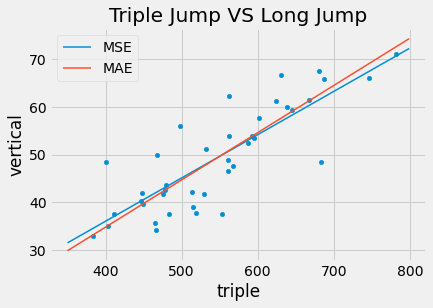

In [150]:
# answer to Question 1 here and in additional cells if needed
def line_mae(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mae(a):
        estimate = a[0]*x + a[1]
        return (np.mean(abs(y - estimate))) 
    return minimize(mae,x0=[0,0],method="Powell") 

jumps_df.plot.scatter('triple','vertical',title='Triple Jump VS Long Jump')

def jump_mse(a):
    estimate = a[0]*jumps_df['triple'] + a[1]
    return (np.mean((jumps_df['vertical']-estimate) ** 2))
mse = minimize(jump_mse, x0=[0,0], method="Powell").x
x = np.arange(350,800)
y = mse[0]*x + mse[1]
line1, = plt.plot(x,y, linewidth=1.5)

def housing_mae(a):
    x = jumps_df['triple']
    y = jumps_df['vertical']
    estimate = a[0]*x + a[1]
    return (np.mean(abs(y - estimate))) 

mae = minimize(housing_mae, x0=[0,0], method="Powell").x
y = mae[0]*x + mae[1]
line2, = plt.plot(x,y, linewidth=1.5)
plt.legend([line1,line2],['MSE','MAE'])

#### Question 2
Based on the scatterplot, does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

The correlation coefficient r looks closest to 0.5. Both the MSA and MSE lines suggest a positive correlation between the triple jump distance and the vertical jump distance. Furthermore, the majority of the points appear to be close to the best fit lines so a correlation between the two variables likely exists. 

#### Question 3
Create a function called `regression_parameters`. It takes as its argument a data frame with two columns.  The first column is the predictor (x-variable), and the second column is the response variable (y-variable). It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [168]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    "Calculate the correlation between two arrays of real numbers."
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

def regression_parameters(df):
    def mse(a):
        estimate = a[0]*df.iloc[:,0] + a[1]
        return (np.mean((df.iloc[:,1]-estimate) ** 2))
    mse = minimize(mse, x0=[0,0], method="Powell").x
    # Our solution had 4 lines above this one; you may use more or less than that
    r = correlation(df.iloc[:,0],df.iloc[:,1])
    slope = mse[0]
    intercept = mse[1]
    return np.array([r, slope, intercept])

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances. Set parameters
# to be the result of calling regression_parameters appropriately.
parameters = regression_parameters(jumps_df)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837594 ; slope: 0.09082004246076382 ; intercept: -0.28371358941200886


r: 0.8343076972837594 ; slope: 0.09082004246076382 ; intercept: -0.28371358941200886

#### Question 4
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [170]:
triple_record_vert_est = parameters[2]+parameters[1]*1829
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 165.826144 centimeters


#### Question 5
Do you expect this estimate to be accurate within a few centimeters? Why or why not?

Not really. Even though the correlation coefficient calculated for the fomula (0.834) is close to 1 indicating that there is a somewhat strong positive linear correlation between vertical and triple jump distances the highest triple jump value recorded in the table is 781 cm or 7.81 meters, which is less than half of the jump by Johnathan Edwards. Thus this estimate of Edwards vertical jump is largely dependent on extrapolated data, which may not be accurate. 

## 3. Cryptocurrencies (14 points)

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable crpytocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attatched to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** 

There is a larger datset on [Kaggle](https://www.kaggle.com/jessevent/all-crypto-currencies/data) from which we obtained two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [106]:
btc_df=pd.read_csv('btc.csv')
print(btc_df.head(10))
btc_df.tail(10)

         date    open   close      market  day
0  2015-09-29  239.02  236.69  3505090000    1
1  2015-09-30  236.64  236.06  3471280000    2
2  2015-10-01  236.00  237.55  3462800000    3
3  2015-10-02  237.26  237.29  3482190000    4
4  2015-10-03  237.20  238.73  3482100000    5
5  2015-10-04  238.53  238.26  3502460000    6
6  2015-10-05  238.15  240.38  3497740000    7
7  2015-10-06  240.36  246.06  3531230000    8
8  2015-10-07  246.17  242.97  3617400000    9
9  2015-10-08  243.07  242.30  3572730000   10


,date,open,close,market,day
825,2018-01-01,14112.2,13657.2,236725000000,826
826,2018-01-02,13625.0,14982.1,228579000000,827
827,2018-01-03,14978.2,15201.0,251312000000,828
828,2018-01-04,15270.7,15599.2,256250000000,829
829,2018-01-05,15477.2,17429.5,259748000000,830
830,2018-01-06,17462.1,17527.0,293091000000,831
831,2018-01-07,17527.3,16477.6,294222000000,832
832,2018-01-08,16476.2,15170.1,276612000000,833
833,2018-01-09,15123.7,14595.4,253935000000,834
834,2018-01-10,14588.5,14973.3,244981000000,835


In [80]:
eth_df=pd.read_csv('eth.csv')
eth_df.head(10)
eth_df.tail(10)

,date,open,close,market,day
825,2018-01-01,755.76,772.64,73075800000,826
826,2018-01-02,772.35,884.44,74695700000,827
827,2018-01-03,886.00,962.72,85703500000,828
828,2018-01-04,961.71,980.92,93049400000,829
829,2018-01-05,975.75,997.72,94423900000,830
830,2018-01-06,995.15,1041.68,96326500000,831
831,2018-01-07,1043.01,1153.17,100981000000,832
832,2018-01-08,1158.26,1148.53,112164000000,833
833,2018-01-09,1146.00,1299.74,110999000000,834
834,2018-01-10,1300.34,1255.82,125976000000,835


#### Question 1

In some of the questions below, we will need to pair the daily 'btc' and 'eth' price data. A simple way is to use the corresponding columns in the two data frames (assuming that they correspond to the same dates). Verify that the rows in the two data frames correspond to the same dates. You can see this for the first 10 observations by looking at the date columns above.



In [85]:
k = 'Dates look good!'
for i in range(0,835):
    if btc_df['date'][i]!=eth_df['date'][i]:
        k = 'Dates do not line up!'
print(k)

Dates look good!



#### Question 2

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as a function of time. Then comment on whether you think the values are correlated.

Text(0, 0.5, 'Open Price in $')

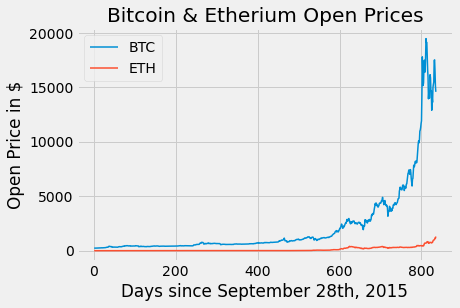

In [147]:
btc_df.plot('day','open', label = 'BTC', linewidth = 1.5)
plt.plot(eth_df['day'],eth_df['open'], label = 'ETH', linewidth = 1.5)
plt.title('Bitcoin & Etherium Open Prices')
plt.legend()
plt.xlabel('Days since September 28th, 2015')
plt.ylabel('Open Price in $')

The daily opening values of Bitcoin and Etherium do not appear to be correlated. The graph for Bitcoin is close to exponential in nature past the 400 day mark, while the graph for Etherium displays much less rapid growth. 

#### Question 3

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

In [152]:
correlation(btc_df['open'],eth_df['open'])

0.9250325764148283

#### Question 4
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

In [175]:
crypair = pd.DataFrame()
crypair['btc'] = btc_df['open']
crypair['eth'] = eth_df['open']

def eth_predictor(btc_price):
    parameters = regression_parameters(crypair)
    slope = parameters[1]
    intercept = parameters[2]
    return intercept + slope*btc_price


#### Question 5

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://inferentialthinking.com/chapters/15/2/Regression_Line.html"> here. </a>
* Think about the table or data frame that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present? Also, what should each row represent? Constructing the table or data frame will be the main part of this question; once you have this, generating the scatter plot should be straightforward as usual.

Text(0.5, 1.0, 'Estimated BTC VS ETH and Actual BTC VS ETH')

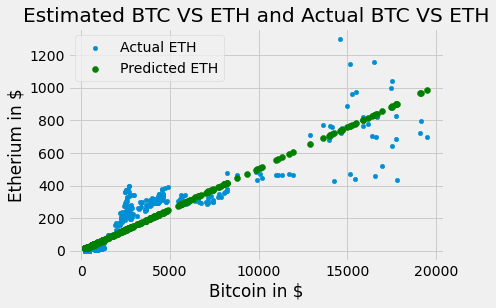

In [176]:
crypair['predicted open'] = eth_predictor(crypair['btc'])
crypair.plot.scatter('btc','eth', label = 'Actual ETH')
plt.scatter(crypair['btc'],crypair['predicted open'], color = 'green', label = 'Predicted ETH')
plt.legend()
plt.xlabel('Bitcoin in $')
plt.ylabel('Etherium in $')
plt.title('Estimated BTC VS ETH and Actual BTC VS ETH')

#### Question 6
For what values of BTC should you be more confident of your predictions? Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features make this model reasonable? If not, what features make it unreasonable?

For small values of opening Bitcoin prices I would be more confident in the predictions because the values are closer to the predicted values. For larger values of Bitcoin prices, the actual values of Etherium are further from the predicted values. The model we used does not seem reasonable because we predicted a linear relationship between Bitcoin and Etherium opening prices in out model, but for high values of Bitcoin the relationship is clearly not linear. 

#### Question 7

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting ETH price given a BTC price? Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `regression_parameters` changes when switching BTC and ETH as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `[True, True, False]`

In [185]:
param = regression_parameters(crypair)
print(param)
switch = pd.DataFrame()
switch['eth'] = eth_df['open']
switch['btc'] = btc_df['open']
switch_param = regression_parameters(switch)
print(switch_param)
regression_changes = [0,1,4]
i = 0
for i in range(3):
    regression_changes[i] = param[i]!=switch_param[i]
regression_changes

[0.92503258 0.05037151 2.13844063]
[  0.92503258  16.98748337 282.30888737]


[False, True, True]

## 4. k nearest neighbors algorithm (15 points)

In this exercise we will construct a prediction algorithm based on the k nearest neighbors (for example, k=5). It is similar to the one we constructed in class - the difference is that here we use a fixed number of neighbors (in class we used a fixed window).

We will illustrate it on simulated data.

The following cells generate two datasets of sample size n=100 (similar to plots we showed in the notebook for Lecture 1). The two datasets show a non-linear trend, and so linear models are not useful for prediction.

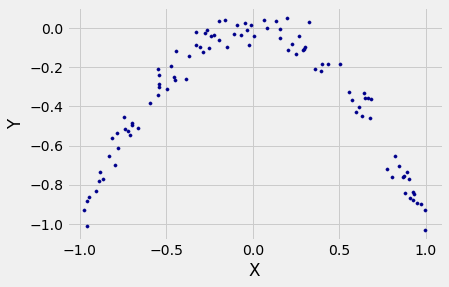

In [186]:
# run this cell
# the first simulated data set
x=np.random.uniform(0,1,100)*2-1

sim1_df = pd.DataFrame()
sim1_df['X'] = x
sim1_df['Y'] = -x**2+np.random.normal(0, 0.05, 100)

plt.scatter(sim1_df.X, sim1_df.Y, s=10,c='darkblue')
plt.xlabel("X")
plt.ylabel("Y");

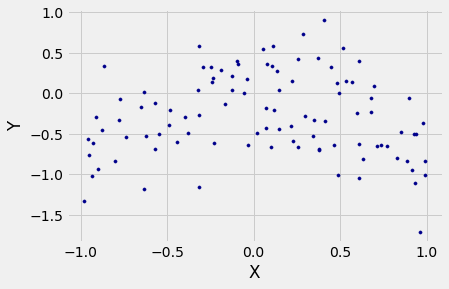

In [187]:
# run this cell
# the second simulated data set
x=np.random.uniform(0,1,100)*2-1

sim2_df = pd.DataFrame()
sim2_df['X'] = x
sim2_df['Y'] = -x**2+np.random.normal(0, 0.4, 100)

plt.scatter(sim2_df.X, sim2_df.Y, s=10,c='darkblue')
plt.xlabel("X")
plt.ylabel("Y");

#### Question 1

Similarly to what we did in Lecture 1 demos, write a function that takes as input: (i) the numbers of neighbors used for prediction (let's call it `k`); (ii)  a data frame (`df`); (iii) a string that is the label of the predictor column (let's call it `X`); (iv)  a string that is the label of the column of interest (variable of interest, let's call it `Y`); and (v)  a float (the value for which we want a prediction, call it `newx`). Look at the cells below for a better understanding of the input for this function.

The function should return a float that is your prediction according to these rules:
- find the k closest rows in `df` to `newx`(close according to the values in the `X` labeled column)
- the prediction is the average of the `Y` values in these k rows.


In [274]:
# use this cell to define your function

def knn(k, df, label1, label2, newx):
    df = df.sort_values(by= label1)
    x_values = list(df[label1])
    y_values = list(df[label2])
    index = 0
    
    for i in range(len(x_values)):
        if newx<=x_values[i]:
            index = i
            break

    sum = y_values[index]
    for i in range(k-1):
        if index == len(x_values)-1:
            sum+=y_values[index]
        elif x_values[index+1]<=x_values[index-1]:
            sum+=y_values[index+1]
            x_values.pop(index+1)
            y_values.pop(index+1)
        else:
            sum+=y_values[index-1]
            x_values.pop(index-1)
            y_values.pop(index-1)
        i+=1
    return sum/(k)

In [275]:
# run this cell to get predictions in the two datasets

[knn(5, sim1_df,'X','Y',0.1), knn(11, sim2_df,'X','Y',-0.3)]

[0.0031621451832658893, 0.15150481036836497]

#### Question 2

For the first simulated dataset, `sim1_df`, add a column called `Prediction5` that contains the predictions based on the function you wrote with k=5 (the predictions are for the values in the `X` column). 

Construct a plot that starts with the scatter plot we show above for `sim1_df` to which you add the points corresponding to the predictions (use a different color for these points). Please note that we constructed a similar plot for the height data in class.

Repeat this for the second simulated dataset.

Text(0.5, 1.0, 'Sim1 Actuals vs Predictions')

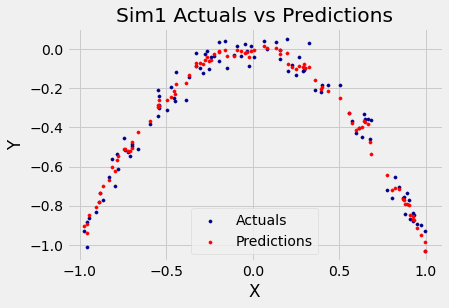

In [288]:
# code here
sim1_df['Prediction5'] = np.zeros(len(sim1_df['X']))
for i in range(len(sim1_df['Prediction5'])):
    sim1_df['Prediction5'][i] = knn(5,sim1_df,'X','Y',sim1_df['X'][i])
    j+=1

plt.scatter(sim1_df.X, sim1_df.Y, s=10,c='darkblue', label = 'Actuals')
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(sim1_df.X,sim1_df.Prediction5, s=10, c='red',label='Predictions')
plt.legend()
plt.title('Sim1 Actuals vs Predictions')

Text(0.5, 1.0, 'Sim2 Actuals vs Predictions')

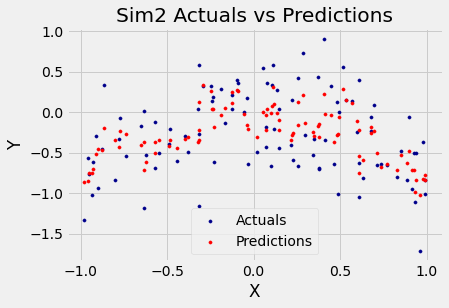

In [287]:
sim2_df['Prediction5'] = np.zeros(len(sim2_df['X']))
for i in range(len(sim2_df['Prediction5'])):
    sim2_df['Prediction5'][i] = knn(5,sim2_df,'X','Y',sim2_df['X'][i])
    j+=1

plt.scatter(sim2_df.X, sim2_df.Y, s=10,c='darkblue', label = 'Actuals')
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(sim2_df.X,sim2_df.Prediction5, s=10, c='red',label='Predictions')
plt.legend()
plt.title('Sim2 Actuals vs Predictions')

#### Question 3

Calculate the following measure of dependence for both datasets, `sim1_df` and `sim2_df`: 
$$1-\frac{sd(e)}{sd(Y)}$$
where:
- the prediction errors, $e$, are calcuated as the difference between the true values (column `Y`) and the predicted values (column `Prediction5`) 
- $sd(e)$ is the sample standard deviation of these prediction errors
- $sd(Y)$ is the sample standard deviation of the values in `Y`.

Write a short justification for this measure of dependence. Hint: when is this measure close to 1 and when is it close to 0? What are the correlations between X and Y in the two datasets?

In [296]:
# calculate 
#sim1:
dif1 = sim1_df['Y']- sim1_df['Prediction5']
out = 1-(np.std(dif1)/np.std(sim1_df['Y']))
print('The measure of dependence for sim1 is:',out)

#sim2:
dif2 = sim2_df['Y']- sim2_df['Prediction5']
out = 1-(np.std(dif2)/np.std(sim2_df['Y']))
print('The measure of dependence for sim2 is:',out)

The measure of dependence for sim1 is: 0.8648566754311524
The measure of dependence for sim2 is: 0.36728066150472305


*Answer here:*  
This measure of indenpendence is close to 1 when the standard deviation of the predicted values is much smaller than the standard deviation of the actual values. It is close to 0 when the standard deviations of the predicted values and the standard deviations of the actual values are close to eachother. This works as a measure of dependence because if the ratio of the standard deviations is closer to 0 it indicates that the predicted values have a similar spread to the actual values. 